## Problem Statement
The data scientist at big mart have collected sales data for 1559 products across ten stores in different cities. Furthermore some attributes of each product and store has been defined. The aim is to build a predictive model and finds the sales figure of each product at a partivular store.
Using this model Big Mart will try to understand the properties of products and store which help in increasing the sales

### Factors affecting the target variable sales
* Time of the week
* Time of the day
* Time of the year
* Store size and location
* The item being in question

## Importing important libraries

In [62]:
import pandas as pd
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import r2_score,mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

## Loading train and test dataset

In [63]:
train = pd.read_csv("./bigmart_train.csv")
test = pd.read_csv("./bigmart_test.csv")

In [64]:
print(train.shape)
print(train.columns)

(8523, 12)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')


In [65]:
print(test.shape)
print(test.columns)

(5681, 11)
Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type'],
      dtype='object')


Here the target variable is 'Item_Outlet_Sales'<br>
Now we will combine the two datsets to perform Exploratory Data Analysis(EDA)

In [66]:
train["source"]="train"
test["source"]="test"
data=pd.concat([train,test],ignore_index=True)
print(data.shape)
data.head()

(14204, 13)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train


## Performing EDA

In [67]:
data.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,11765.000000,14204.000000,14204.000000,14204.000000,8523.000000
mean,12.792854,0.065953,141.004977,1997.830681,2181.288914
std,4.652502,0.051459,62.086938,8.371664,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.710000,0.027036,94.012000,1987.000000,834.247400
50%,12.600000,0.054021,142.247000,1999.000000,1794.331000
75%,16.750000,0.094037,185.855600,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [68]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

* Item_Weigth has 2439 null values
* Outlet_Size has 4016 null values
* Item_Outlet_Sales has 5681 null values because they belong to the test dataset

In [69]:
data['Item_Fat_Content'].unique()
#There are only two unique values of Fat content i.e. Low Fat and Regular

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [70]:
#counting the frequency of each fat catagory
data['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [71]:
#finding unique value of establishment year
data['Outlet_Establishment_Year'].unique()

array([1999, 2009, 1998, 1987, 1985, 2002, 2007, 1997, 2004], dtype=int64)

In [72]:
#calculating the age of the store
data['Outlet_Age']=2022-data['Outlet_Establishment_Year']
data.head(2)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13


In [73]:
#unique values in Outlet size
data['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [74]:
#counting the frequency of each size catagory
data['Outlet_Size'].value_counts()
#most abundant are medium and small sized stores

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [75]:
#finding the most common value of the outlet size
data["Outlet_Size"].mode()[0]
#'Medium' is the most commonly occuring value

'Medium'

In [76]:
#replacing the null values of outlet size with 'Medium'
data['Outlet_Size']=data['Outlet_Size'].fillna(data['Outlet_Size'].mode()[0])

In [77]:
#similarly replacing the i=missing values of item weigth with the mean weight
data['Item_Weight']=data['Item_Weight'].fillna(data['Item_Weight'].mean())

In [78]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
Outlet_Age                      0
dtype: int64

<AxesSubplot:>

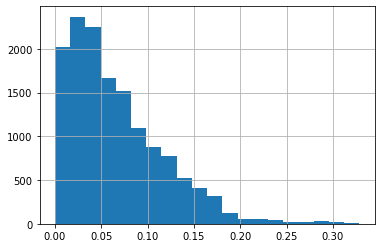

In [79]:
#plotting histogram to reveal the distribution of the item_visibility column
data['Item_Visibility'].hist(bins=20)

### Finding the Outlier
An **outlier** is a data point which lies outside the overall pattern of the data<br>
A point is an outlier if it is 1.5*IOR above the third qutrile or below the first quatrile<br>
**First Quatrile** (Q1)It is the 25 percent of data<br>
**Third Quatrile** (Q3)It is the 75 percent of data<br>
**IQR** It is Inter Quartile Range and IQR = Q3 - Q1

In [80]:
q1=data['Item_Visibility'].quantile(0.25)
q3=data['Item_Visibility'].quantile(0.75)
iqr=q3-q1

In [81]:
#removing the outlinrs from the data
#storing the new data in fill_data
fill_data=data.query('(@q1-1.5*@iqr) <= Item_Visibility <= (@q3+1.5*@iqr)')
print(fill_data.shape)
fill_data.head(3)

(13943, 14)


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,23


In [82]:
data=fill_data

In [83]:
data['Item_Fat_Content'].value_counts()

Low Fat    8352
Regular    4721
LF          506
reg         190
low fat     174
Name: Item_Fat_Content, dtype: int64

In [84]:
#replacing typos in Item_Fat_content 
#replacing low fat -> Low Fat
#replacing reg -> Regular
#replacing LF -> Low Fat

data["Item_Fat_Content"]=data["Item_Fat_Content"].replace(["low fat","LF"],"Low Fat")
data["Item_Fat_Content"]=data["Item_Fat_Content"].replace("reg","Regular")

In [85]:
data['Item_Fat_Content'].value_counts()

Low Fat    9032
Regular    4911
Name: Item_Fat_Content, dtype: int64

## Converting all categorical values as numeric using 'LabelEncoder'

In [86]:
le=LabelEncoder()
data['Item_Fat_Content']=le.fit_transform(data['Item_Fat_Content'])
data['Outlet_Size']=le.fit_transform(data['Outlet_Size'])
data['Outlet_Location_Type']=le.fit_transform(data['Outlet_Location_Type'])
data.head(3)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,train,23
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,train,13
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,train,23


In [87]:
data['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [88]:
#create dummies for Outlet_Type
dummy = pd.get_dummies(data['Outlet_Type'])
dummy.head()

,Grocery Store,Supermarket Type1,Supermarket Type2,Supermarket Type3
0,0,1,0,0
1,0,0,1,0
2,0,1,0,0
3,1,0,0,0
4,0,1,0,0


In [89]:
data['Item_Identifier'].value_counts()

FDE33    10
FDM12    10
FDY47    10
FDT03    10
FDO01    10
         ..
FDA10     7
FDO33     7
FDZ60     7
NCW54     7
FDG21     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [90]:
#there are multiple cateogories so we need to reduce it by mapping
data['Item_Type_Combined']=data['Item_Identifier'].apply(lambda x : x[0:2])
data['Item_Type_Combined']=data['Item_Type_Combined'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})

In [91]:
data['Item_Type_Combined'].value_counts()

Food              9991
Non-Consumable    2652
Drinks            1300
Name: Item_Type_Combined, dtype: int64

In [92]:
data.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Age,Item_Type_Combined
0,FDA15,9.30,0,0.016047,Dairy,249.8092,OUT049,1999,1,0,Supermarket Type1,3735.1380,train,23,Food
1,DRC01,5.92,1,0.019278,Soft Drinks,48.2692,OUT018,2009,1,2,Supermarket Type2,443.4228,train,13,Drinks
2,FDN15,17.50,0,0.016760,Meat,141.6180,OUT049,1999,1,0,Supermarket Type1,2097.2700,train,23,Food
3,FDX07,19.20,1,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,1,2,Grocery Store,732.3800,train,24,Food
4,NCD19,8.93,0,0.000000,Household,53.8614,OUT013,1987,0,2,Supermarket Type1,994.7052,train,35,Non-Consumable


In [93]:
#perform encoding on all columns
data=pd.get_dummies(data,columns=['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','Outlet_Type','Item_Type_Combined'])

In [94]:
data.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_Type                             object
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Establishment_Year              int64
Item_Outlet_Sales                    float64
source                                object
Outlet_Age                             int64
Item_Fat_Content_0                     uint8
Item_Fat_Content_1                     uint8
Outlet_Location_Type_0                 uint8
Outlet_Location_Type_1                 uint8
Outlet_Location_Type_2                 uint8
Outlet_Size_0                          uint8
Outlet_Size_1                          uint8
Outlet_Size_2                          uint8
Outlet_Type_Grocery Store              uint8
Outlet_Type_Supermarket Type1          uint8
Outlet_Type_Supermarket Type2          uint8
Outlet_Type_Supermarket Type3          uint8
Item_Type_

In [95]:
#drop the columns that are converted to different types
data.drop(['Item_Type','Outlet_Establishment_Year'],axis=1,inplace=True)

## Dividing The data To Train and Test just like before

In [96]:
train=data.loc[data['source']=='train']
test=data.loc[data['source']=='test']

#drop the unnecessary columns
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)
train.drop(['source'],axis=1,inplace=True)

c:\Users\Dell\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [97]:
#importing the cleaned data to files
train.to_csv("train_modified.csv",index=False)
test.to_csv("test_modified.csv",index=False)

In [98]:
train2=pd.read_csv('./train_modified.csv')
test2=pd.read_csv('./test_modified.csv')

In [99]:
train2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Item_Outlet_Sales                    float64
Outlet_Age                             int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_Combined_Non-Consumable      int64
dtype: obj

In [100]:
#considering only required columns for independent variable X
x_train=train2.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train=train2.Item_Outlet_Sales
print(x_train.shape)
print(y_train.shape)

(8375, 19)
(8375,)


In [101]:
test2.dtypes

Item_Identifier                       object
Item_Weight                          float64
Item_Visibility                      float64
Item_MRP                             float64
Outlet_Identifier                     object
Outlet_Age                             int64
Item_Fat_Content_0                     int64
Item_Fat_Content_1                     int64
Outlet_Location_Type_0                 int64
Outlet_Location_Type_1                 int64
Outlet_Location_Type_2                 int64
Outlet_Size_0                          int64
Outlet_Size_1                          int64
Outlet_Size_2                          int64
Outlet_Type_Grocery Store              int64
Outlet_Type_Supermarket Type1          int64
Outlet_Type_Supermarket Type2          int64
Outlet_Type_Supermarket Type3          int64
Item_Type_Combined_Drinks              int64
Item_Type_Combined_Food                int64
Item_Type_Combined_Non-Consumable      int64
dtype: object

In [102]:
x_test=test2.drop(['Outlet_Identifier','Item_Identifier'],axis=1)
print(x_test.shape)
x_test.head()

(5568, 19)


,Item_Weight,Item_Visibility,Item_MRP,Outlet_Age,Item_Fat_Content_0,Item_Fat_Content_1,Outlet_Location_Type_0,Outlet_Location_Type_1,Outlet_Location_Type_2,Outlet_Size_0,Outlet_Size_1,Outlet_Size_2,Outlet_Type_Grocery Store,Outlet_Type_Supermarket Type1,Outlet_Type_Supermarket Type2,Outlet_Type_Supermarket Type3,Item_Type_Combined_Drinks,Item_Type_Combined_Food,Item_Type_Combined_Non-Consumable
0,20.750000,0.007565,107.8622,23,1,0,1,0,0,0,1,0,0,1,0,0,0,1,0
1,8.300000,0.038428,87.3198,15,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0
2,14.600000,0.099575,241.7538,24,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1
3,7.315000,0.015388,155.0340,15,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0
4,12.792854,0.118599,234.2300,37,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0


## Training The Data
* we will first find the linear coeeficient and intercept using the x_train and y_train data and then we will predict the sales for test data

In [103]:
model=LinearRegression()

#to calculate rmse value we need to split the trainign data and create the model
xtrain,xtest,ytrain,ytest=tts(x_train,y_train,test_size=0.3,random_state=43)
model.fit(xtrain,ytrain)


LinearRegression()

In [104]:
print(model.coef_)
print(model.intercept_)


[ 2.83813118e-01 -1.08460758e+02  1.57905135e+01 -4.64848188e+01
 -2.18039241e+01  2.18039241e+01  2.78671613e+02  4.74209458e+01
 -3.26092558e+02  7.34660567e+02 -4.03334693e+02 -3.31325874e+02
 -1.59413086e+03 -2.82981906e+02 -5.12449708e+02  2.38956248e+03
  3.67201884e-01  8.93947991e+00 -9.30668180e+00]
1565.5188500632376


In [105]:
prediction = model.predict(xtest)
print(math.sqrt(mean_squared_error(ytest,prediction)))

1144.1898133647883


It is a very high error which can be reduced by employing other algorithms like decision tree, random forest

## Predicting the Item_Outlet_Sales for the test dataset

In [106]:
y_sales_predict=model.predict(x_test)
y_sales_predict.shape

(5568,)

In [107]:
test2['Item_Identifier']

0       FDW58
1       FDW14
2       NCN55
3       FDQ58
4       FDY38
        ...  
5563    FDB58
5564    FDD47
5565    NCO17
5566    FDJ26
5567    FDU37
Name: Item_Identifier, Length: 5568, dtype: object

In [110]:
test_predictions=pd.DataFrame({'Item_Identifier': test2['Item_Identifier'], 'Outlet_Identifier' : test2['Outlet_Identifier'], 'Item_Outlet_Slaes' : y_sales_predict})
test_predictions

,Item_Identifier,Outlet_Identifier,Item_Outlet_Slaes
0,FDW58,OUT049,1784.126748
1,FDW14,OUT017,1637.106554
2,NCN55,OUT010,1905.974825
3,FDQ58,OUT017,2664.959998
4,FDY38,OUT027,5225.838569
...,...,...,...
5563,FDB58,OUT046,2331.464549
5564,FDD47,OUT018,2407.613977
5565,NCO17,OUT045,1835.708119
5566,FDJ26,OUT017,3653.425091
